In [296]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json


file_dir = "/data03/sunyi/time_constrained_cot/outputs/2_4"
model_list = [
    # "NovaSky-AI/Sky-T1-32B-Preview",
    # "Qwen/QwQ-32B-Preview",
    "Qwen/Qwen2.5-32B-Instruct",
    "Qwen/Qwen2.5-14B-Instruct", 
    "Qwen/Qwen2.5-7B-Instruct", 
    "Qwen/Qwen2.5-3B-Instruct", 
    "Qwen/Qwen2.5-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-7B-Instruct",
    # "internlm/internlm2_5-1_8b-chat",
    # "internlm/internlm2_5-7b-chat",
    # "internlm/internlm2_5-20b-chat",
    "mistralai/Mistral-Small-Instruct-2409",
    "mistralai/Mistral-Nemo-Instruct-2407",
    "mistralai/Ministral-8B-Instruct-2410",
    "mistralai/Mathstral-7B-v0.1",
    "google/gemma-2-27b-it",
    "google/gemma-2-9b-it",
    "google/gemma-2-2b-it",
    "microsoft/phi-4",
    "microsoft/Phi-3-medium-128k-instruct",
    "microsoft/Phi-3-small-128k-instruct",
    "microsoft/Phi-3-mini-128k-instruct",
    "microsoft/Phi-3.5-mini-instruct",
    # "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
    # "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
    # "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
    # "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
    # "deepseek-ai/DeepSeek-R1-Distill-Llama-8B",
    # "meta-llama/Llama-3.2-3B-Instruct",
    # "meta-llama/Llama-3.2-1B-Instruct",
    # "meta-llama/Llama-3.1-8B-Instruct"
]

In [297]:
PROMP_LIST = [ "-sbs", "-c2f", "-sbs-hard", "-c2f-hard"]


MODEL_SERIES_MAP = {
    "Qwen/QwQ-32B-Preview": "qwen",
    "Qwen/Qwen2.5-32B-Instruct": "qwen",
    "Qwen/Qwen2.5-14B-Instruct": "qwen",
    "Qwen/Qwen2.5-7B-Instruct": "qwen",
    "Qwen/Qwen2.5-3B-Instruct": "qwen",
    "Qwen/Qwen2.5-1.5B-Instruct": "qwen",
    "Qwen/Qwen2.5-Math-1.5B-Instruct": "qwen-math",
    "Qwen/Qwen2.5-Math-7B-Instruct": "qwen-math",
    "internlm/internlm2_5-1_8b-chat": "internlm",
    "internlm/internlm2_5-7b-chat": "internlm",
    "internlm/internlm2_5-20b-chat": "internlm",
    "google/gemma-2-2b-it": "gemma",
    "google/gemma-2-9b-it": "gemma",
    "google/gemma-2-27b-it": "gemma",
    "mistralai/Mathstral-7B-v0.1": "mistral",
    "mistralai/Ministral-8B-Instruct-2410": "mistral",
    "mistralai/Mistral-Nemo-Instruct-2407": "mistral",
    "mistralai/Mistral-Small-Instruct-2409": "mistral",
    "microsoft/phi-4": "phi4",
    "microsoft/Phi-3-medium-128k-instruct": "phi3medium",
    "microsoft/Phi-3-small-128k-instruct": "phi3small",
    "microsoft/Phi-3.5-mini-instruct": "phi3mini",
    "microsoft/Phi-3-mini-128k-instruct": "phi3mini",
    "NovaSky-AI/Sky-T1-32B-Preview": "qwen",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B": "deepseek-r1-distill",
    "meta-llama/Llama-3.2-3B-Instruct": "llama",
    "meta-llama/Llama-3.2-1B-Instruct": "llama",
    "meta-llama/Llama-3.1-8B-Instruct": "llama"
}


MODEL_SERIES_PROMPT_TYPE_MAP = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST],
    "qwen-math": ["qwen-math" + prompt for prompt in PROMP_LIST],
    "internlm": ["internlm"+prompt for prompt in PROMP_LIST],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST],
    "phi3mini": ["phi3mini"+prompt for prompt in PROMP_LIST],
    "phi3small": ["phi3small"+prompt for prompt in PROMP_LIST],
    "phi3medium": ["phi3medium"+prompt for prompt in PROMP_LIST],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST],
    "deepseek-r1-distill": ["deepseek-r1-distill"+prompt for prompt in PROMP_LIST],
    "llama": ["llama"+prompt for prompt in PROMP_LIST]
}

In [298]:
def gen_budget_list(budget, data_name, model):
    if budget < 0:
        return [-1]
    elif budget == 0:
        return [25]
    else:
        o1_like_models = [
            "Qwen/QwQ-32B-Preview", 
            "Skywork/Skywork-o1-Open-Llama-3.1-8B", 
            "PowerInfer/SmallThinker-3B-Preview",
            "NovaSky-AI/Sky-T1-32B-Preview", 
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
            "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
        ]
        if model in o1_like_models:
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 701, 50):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 2401, 50):
                    budget_list.append(i)
        else:    
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 601, 25):
                    budget_list.append(i)
                # for i in range(600, 1001, 50):
                #     budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 1201, 50):
                    budget_list.append(i)
        return budget_list


In [299]:
dataset = "math500"   
something = "_-1_seed0_t0.0_s0_e-1"

In [300]:
model_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

model_acc_dicts

{'Qwen/Qwen2.5-32B-Instruct': {'qwen-sbs': [37.4,
   37.0,
   36.4,
   38.0,
   40.2,
   43.2,
   43.8,
   48.6,
   51.0,
   56.2,
   58.6,
   61.0,
   61.8,
   64.0,
   64.6,
   66.0,
   67.6,
   68.8,
   69.8,
   72.2,
   73.0,
   75.2,
   75.6,
   75.0,
   77.2,
   78.4,
   79.0,
   79.8,
   80.2,
   81.2,
   82.0,
   82.0,
   82.2,
   82.8,
   82.4,
   82.6],
  'qwen-c2f': [37.2,
   41.8,
   43.2,
   50.8,
   51.8,
   53.6,
   56.6,
   57.0,
   56.4,
   59.2,
   62.0,
   62.6,
   63.6,
   64.4,
   65.8,
   65.2,
   67.8,
   68.6,
   70.8,
   71.6,
   73.6,
   74.6,
   75.4,
   75.8,
   76.4,
   77.0,
   77.0,
   77.6,
   78.2,
   78.4,
   78.6,
   78.6,
   78.4,
   78.4,
   78.6,
   78.6],
  'qwen-sbs-hard': [0.2,
   0.2,
   0.2,
   0.2,
   0.4,
   0.8,
   1.6,
   3.4,
   5.2,
   8.6,
   14.8,
   19.0,
   23.8,
   28.0,
   33.0,
   37.0,
   41.8,
   45.8,
   48.8,
   50.8,
   54.0,
   58.8,
   60.0,
   61.8,
   64.6,
   68.2,
   71.4,
   74.4,
   76.2,
   77.6,
   79.0,
   79.8,
  

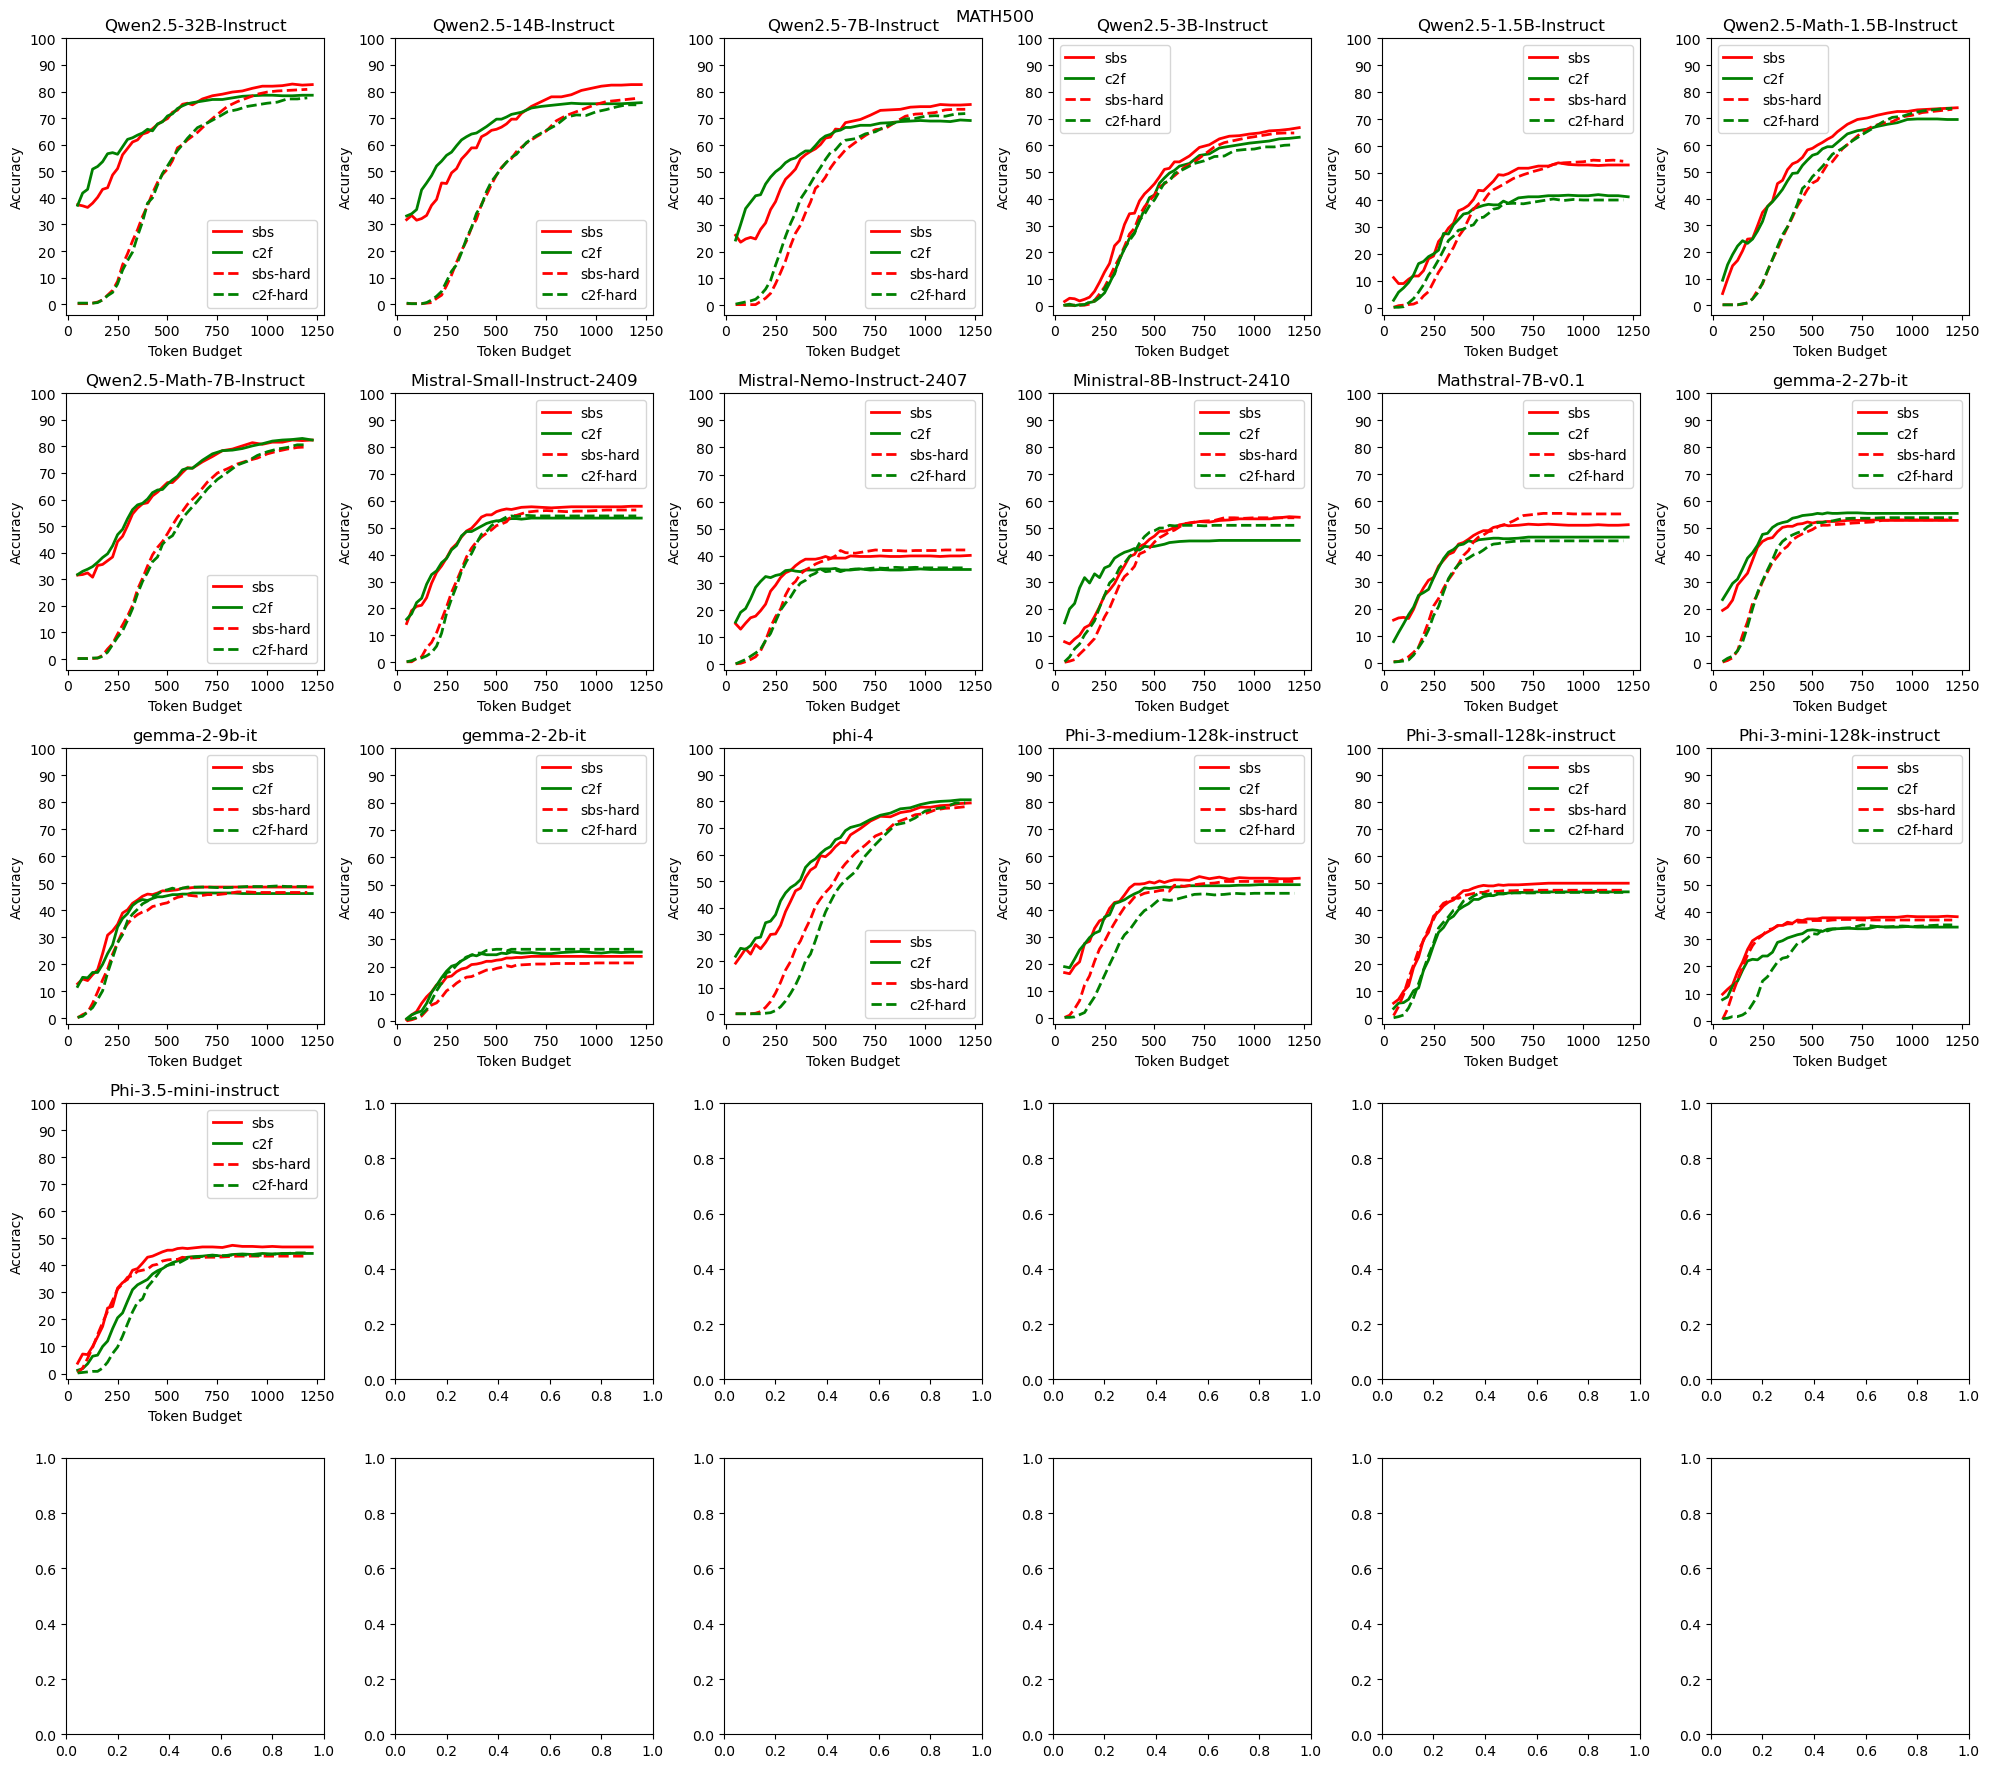

In [301]:
# Create a 2x3 subplot
fig, axs = plt.subplots(5,6, figsize=(20, 18))
marker_size = 5  # Set the desired marker size
line_width = 2   # Set the desired line width

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot all lines first without labels
for index, model in enumerate(model_list):
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        if "sbs-hard" in prompt_type:
            axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="red", label="sbs-hard", linewidth=line_width)
        elif "direct-hard" in prompt_type:
            axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="orange", label="direct-hard", linewidth=line_width)
        elif "quick-hard" in prompt_type:
            axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="pink", label="quick-hard", linewidth=line_width)
        elif "c2f-hard" in prompt_type:
            axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="green", label="c2f-hard", linewidth=line_width)
        elif "aav-hard" in prompt_type:
            axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="purple", label="aav-hard", linewidth=line_width)
        elif "sbs" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="red", label="sbs", linewidth=line_width)
        elif "direct" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="orange", label="direct", linewidth=line_width)
        elif "quick" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="pink", label="quick", linewidth=line_width)
        elif "c2f" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="green", label="c2f", linewidth=line_width)
        # elif "kf" in prompt_type:
        #     axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="blue", label="kf", linewidth=line_width)
        elif "aav" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="purple", label="aav", linewidth=line_width)
        
        axs[index].set_xlabel("Token Budget")
        axs[index].set_ylabel("Accuracy")
        axs[index].set_title(f"{model.split('/')[-1]}")
        axs[index].legend()
        
        # Set y-axis and x-axis ticks
        axs[index].set_yticks(range(0, 101, 10))  # Set y-axis interval to 10
        # axs[index].set_xticks(range(0, 551, 50))  # Set x-axis interval to 50

# set the title
plt.suptitle(f"{dataset}".upper())
# Adjust layout
plt.tight_layout()

In [302]:
# for prompt in ["-quick", "-direct", "-sbs", "-c2f", "-aav"]:
    
    
#     # Create a 2x3 subplot
#     fig, axs = plt.subplots(3, 6, figsize=(20, 10))
#     marker_size = 5  # Set the desired marker size
#     line_width = 2   # Set the desired line width

#     # Flatten the axes array for easy iteration
#     axs = axs.flatten()

#     # Plot all lines first without labels
#     for index, model in enumerate(model_list):
#         budget_list = gen_budget_list(1, dataset, model)
#         model_prompt_list = [MODEL_SERIES_MAP[model] + prompt, MODEL_SERIES_MAP[model] + prompt + "-hard"]
#         for prompt_type in model_prompt_list:
#             if "sbs-hard" in prompt_type:
#                 axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="red", label="sbs-hard", linewidth=line_width)
#             elif "direct-hard" in prompt_type:
#                 axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="orange", label="direct-hard", linewidth=line_width)
#             elif "quick-hard" in prompt_type:
#                 axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="pink", label="quick-hard", linewidth=line_width)
#             elif "c2f-hard" in prompt_type:
#                 axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="green", label="c2f-hard", linewidth=line_width)
#             elif "aav-hard" in prompt_type:
#                 axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="purple", label="aav-hard", linewidth=line_width)
#             elif "sbs" in prompt_type:
#                 axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="red", label="sbs", linewidth=line_width)
#             elif "direct" in prompt_type:
#                 axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="orange", label="direct", linewidth=line_width)
#             elif "quick" in prompt_type:
#                 axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="pink", label="quick", linewidth=line_width)
#             elif "c2f" in prompt_type:
#                 axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="green", label="c2f", linewidth=line_width)
#             # elif "kf" in prompt_type:
#             #     axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="blue", label="kf", linewidth=line_width)
#             elif "aav" in prompt_type:
#                 axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="purple", label="aav", linewidth=line_width)
            
#             axs[index].set_xlabel("Token Budget")
#             axs[index].set_ylabel("Accuracy")
#             axs[index].set_title(f"{model.split('/')[-1]}")
#             axs[index].legend()
            
#             # Set y-axis and x-axis ticks
#             axs[index].set_yticks(range(0, 91, 10))  # Set y-axis interval to 10
#             # axs[index].set_xticks(range(0, 551, 50))  # Set x-axis interval to 50

#     # set the title
#     plt.suptitle(f"{dataset}".upper())
#     # Adjust layout
#     plt.tight_layout()